<a href="https://colab.research.google.com/github/girotodenis/semisupervisionada/blob/master/Lista_RL_2019_1_%3CNOME_INICIAL_DOS_INTEGRANTES_DO_GRUPO%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios - Reinforcement Learning

NOME COMPLETO DOS INTEGRANTES DO GRUPO:

MATRÍCULAS DOS INTEGRANTES DO GRUPO:

**AVISOS**:

- **Mantenha a estrutura de enunciados e células de resposta da lista original na lista a ser entregue.**
- **Todas as análises e justificativas solicitadas devem estar acompanhadas de códigos e plots realizados.**
- **As listas deverão ser compartilhadas no e-mail nguerinjr@gmail.com .**

# EXERCÍCIOS

In [2]:
actions8 = [  
              (-1, -1), (-1, 0), (-1, 1),
              ( 0, -1),          ( 0, 1),
              ( 1,  1), ( 1, 0), ( 1, 1)
          ]
pcardeais8 = [
            'NO','N_','NE',
            'O_',     'L_',
            'SO','S_','SE']

actions4 = [  
                    (-1, 0),
          (0, -1),          (0, 1),
                    (1,  0)
          ]

pcardeais4 = [
                 'N_',
            'O_',     'L_',
                 'S_']

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

In [4]:
class Mundo:
    
  def __init__(self, y, x, i, f, pcardeais, actions, forca_vento_coluna):
        
      self.row = y 
      self.col = x
      
      self.pcardeais = pcardeais
      self.actions = actions
        
      self.grade = [ (row, col) for row in range(self.row) for col in range(self.col)]
      self.forca_vento_coluna = forca_vento_coluna
      self.inicio = i
      self.fim = f
      
      self.movimentos = []
      
  def is_inicio(self, posicao):
      return posicao[0] == self.inicio[0] and posicao[1] == self.inicio[1]

  def is_fim(self, posicao):
      return posicao[0] == self.fim[0] and posicao[1] == self.fim[1]

  def pcardeal_to_action(self, pcardeal):
      indexes = [i for i,x in enumerate(self.pcardeais) if x == pcardeal]
      return self.actions[indexes[0]]

  def action_to_pcardeal(self, action):
      indexes = [i for i,x in enumerate(self.actions) if x == action]
      return self.pcardeais[indexes[0]]
      
  def mover(self, origem, movimento):
      
      destino = np.array(origem) + np.array(movimento)
      
      if -1 in list(destino) or self.col in list(destino):
          self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))  )
          return self.movimentos[-1]
          #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) 
      
      coluna_destino = destino[1]
      forca_vento = self.forca_vento_coluna[coluna_destino]
      
      if forca_vento > 0:
          for it in range(forca_vento):
              destino = np.array(destino) + np.array(self.pcardeal_to_action('N_'))
              if -1 in list(destino) or self.col in list(destino):
                  self.movimentos.append( (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
                  return self.movimentos[-1]
                  #return (None, self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino))
      
      self.movimentos.append( (tuple(destino), self.action_to_pcardeal(movimento), self.is_inicio(destino), self.is_fim(destino)) )
      return  self.movimentos[-1]
  
  def limpar_caminho_realizaso(self):
        self.movimentos = []  
  
  def caminho_realizaso(self,posicao_inicio):
      
      tmp = [[ '__' for row in range(self.row)] for col in range(self.col)]
      tmp = np.array(tmp)
      tmp[posicao_inicio] = 'i_'
      tmp[self.fim] = 'f_'
      
      
      movs = []
      if len(self.movimentos)>0 :
          for mov in self.movimentos:
              movs.append(mov[1])
              if mov[0] is not None and tmp[mov[0]] !='f_':
                  tmp[mov[0]] = mov[1]
          print(tmp)
      return movs
      

In [5]:
mundo = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
posicao, movimento, inicio, fim = mundo.mover((0, 0), mundo.pcardeal_to_action('L_'))
print(inicio,fim)
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('L_'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('S_'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('O_'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('S_'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('S_'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('L_'))
posicao, movimento, inicio, fim = mundo.mover(posicao, mundo.pcardeal_to_action('L_'))
print(inicio,fim)
print(mundo.caminho_realizaso((0, 0)))
mundo.limpar_caminho_realizaso()
mundo.caminho_realizaso((0, 0))

False False
False True
[['i_' 'L_' 'L_' '__']
 ['__' 'O_' 'S_' '__']
 ['__' 'S_' '__' '__']
 ['__' 'S_' 'L_' 'f_']]
['L_', 'L_', 'S_', 'O_', 'S_', 'S_', 'L_', 'L_']


[]

In [85]:
class Agente:
  def __init__(self, iterations = 10000): 
      #Rt = -1 -> em todas transições
      self.iterations = iterations
      self.Q = None

  def learn(self, mundo, Algoritimo):
      
      deltas = {(row, col):list() for row in range(mundo.row) for col in range(mundo.col)}
      
      tmp = [[Algoritimo(mundo.actions, row, col) for row in range(mundo.row)] for col in range(mundo.col)]
      self.Q = np.array(tmp)
      
      for it in range(self.iterations):

          posicao = tuple(random.choice(mundo.grade))
          
          posicao_i = posicao
          
          mundo.limpar_caminho_realizaso()
          
          sub = 0
          while True:
              sub += 1
              
              if sub>1000:
                  break
          
              current_cell = self.Q[posicao]
              
              #print(current_cell)
              
              action = current_cell.explorar(mundo.actions)
              reward, nova_posicao = current_cell.takeAction(posicao, action, mundo)
              
              if nova_posicao is None:
                  break
              
              next_cell =  self.Q[nova_posicao] 
              old_cell_value = current_cell.value
              current_cell.learn(reward,current_cell, next_cell)
          
              deltas[posicao].append(float(np.abs(old_cell_value - current_cell.value)))
              
              posicao = nova_posicao
              
      print('fim.')
      all_series = [list(x)[:50] for x in deltas.values()]
      return all_series

  def grid(self):
    for i in self.Q:
      for j in i:
        try:
          print("{:.6}".format(j.value), end=" ")
        except:
          print(j.value, end=" ")
      print()

  def melhor_caminho(self,posicao_inicio, mundo):

      #posicao = mundo.inicio
      posicao = posicao_inicio
      
      mundo.limpar_caminho_realizaso()
      anterio = posicao_inicio
      for it in range(20):
          
          current_cell = self.Q[posicao]
          
          valor = None
          action = None
          for mov in mundo.actions:
            nova_posicao, movimento, inicio, fim = mundo.mover(posicao, mov)
            del(mundo.movimentos[-1])
            if nova_posicao is not None and nova_posicao != anterio:
              proximo_cell = self.Q[nova_posicao]
              if valor is None or valor < proximo_cell.value:
                action = mov
                valor = proximo_cell.value
          #action = current_cell.explorar(mundo.actions)
          nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)
          
          if nova_posicao is None or fim:
              break
          
          anterio = posicao
          next_cell =  self.Q[nova_posicao] 
          posicao = nova_posicao
          
      return mundo.caminho_realizaso(posicao_inicio)

1) Considere o gridworld do exemplo apresentado no slide 48/70 do tópico 3, onde há 14 estados não-terminais e 2 estados terminais. Nesse cenário, a recompensa é -1 para todas as transições, inclusive para os estados terminais. Nos slides apresentados (que também pode ser visto no livro base da disciplina), é possível ver diferentes iterações da policy evaluation e qual seria a política greedy correspondente. Em apenas 3 iterações, já a política greedy já é a política ótima.

Reimplemente o mesmo exemplo usando o algoritmo de policy iteration. Nesse caso, considere que cada etapa de policy evaluation terá apenas 1 iteração.

**Responda**: o algoritmo consegue chegar na política ótima? Quantas iterações entre evaluation e improvement foram necessárias? O método convergiu mais rápido do que a policy evaluation do exemplo? Exiba a política greedy obtida em cada iteração da policy iteration.

In [95]:
class PolicyImprovement:
    def __init__(self, actions, row, col):
        self.cell = (row, col)
        self.reward_value = -1
        self.value = 0
        self.gamma = 1.0
        self.alpha = 0.5 
        #self.epsilon = 0.1  

    def explorar(self, actions ):
        action = self.explore(actions)
        return action  
    
    def explore(self, actions):
        action = random.choice(actions);
        self.indexActions = actions.index(action)
        return action
    
    def learn(self, reward_value, current_cell, cell_final_state ):
        # Iteração de Valor (Value Iteration)
        #exemplo ???????
        self.value += self.alpha * (reward_value + self.gamma * cell_final_state.value - self.value)
        #print(self.value)

    def takeAction(self, posicao, action, mundo):
        #if mundo.is_fim(tuple(posicao)):
        #    return -1, None
        nova_posicao, movimento, inicio, fim = mundo.mover(posicao, action)
        
        if inicio or fim:
            return -1, None
        #saiu do mundo - Ações que levam o agente para fora do grid deixam o estado inalterado;
        if nova_posicao is None or inicio:
            return -1, posicao
        #Rt = -1 -> em todas transições
        return self.reward_value, tuple(nova_posicao)

In [96]:

mundo = Mundo(4, 4, (0, 0), (3, 3), pcardeais4, actions4, [0,0,0,0])
agente = Agente(100)
melhor_caminho = agente.learn(mundo, PolicyImprovement)
print(agente.grid())
print()
print(agente.melhor_caminho(mundo.inicio, mundo))


fim.
-21.6926 -52.5063 -51.1617 -51.3292 
-48.8447 -49.8893 -50.6576 -48.4011 
-49.854 -50.3145 -50.4652 -46.1502 
-50.9684 -50.5946 -49.8161 -27.15 
None

[['N_' 'L_' '__' '__']
 ['O_' 'S_' '__' '__']
 ['S_' 'L_' '__' '__']
 ['__' '__' '__' 'f_']]
['S_', 'S_', 'L_', 'N_', 'O_', 'N_', 'L_', 'S_', 'O_', 'N_', 'L_', 'S_', 'O_', 'N_', 'L_', 'S_', 'O_', 'N_', 'L_', 'S_']


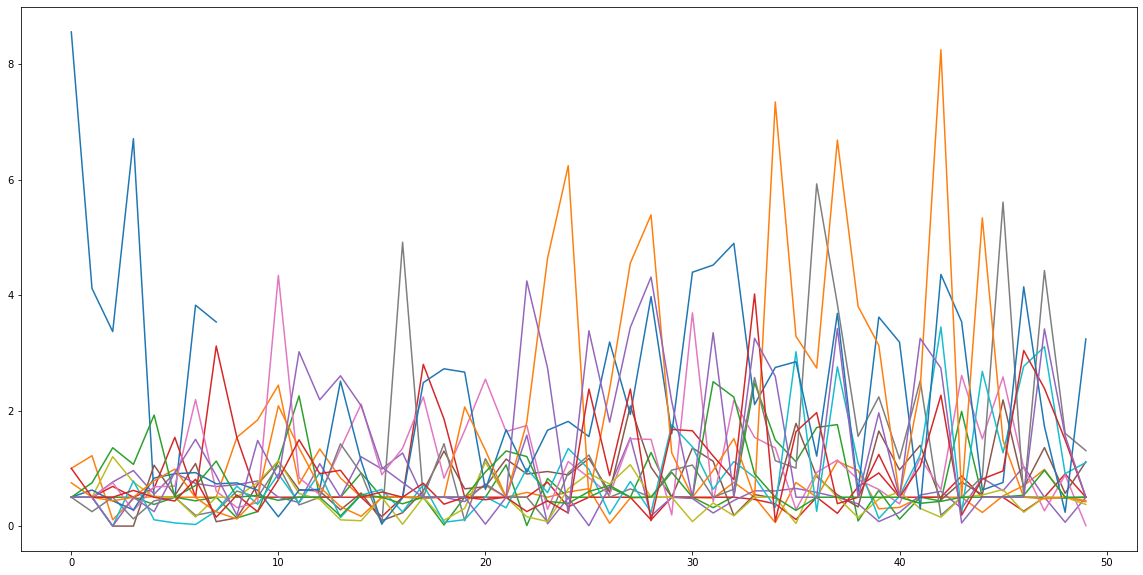

In [89]:
plt.figure(figsize=(20,10))
all_series = melhor_caminho
for series in all_series:
    plt.plot(series)

2) Escolha um gridworld de preferência dentre os constantes na library de gridworlds e treine um agente nesse gridworld usando o método de Monte Carlo. Exiba uma demonstração do agente andando pelo gridworld após o treinamento realizado.

In [ ]:
# Células de código aqui

3) Implemente agora o Sarsa no cenário **Windy Gridworld with King's Moves**. Esse cenário é o mesmo windy gridworld mas, dessa vez, há oito possíveis ações: as usuais e as ações nas diagonais.

Compare os resultados no grid com o cenário do exercício 3. Responda com base nos experimentos e plots: ter a disposição mais ações ajuda a acelerar a convergência do algoritmo? O caminho escolhido pelo agente muda?

In [ ]:
# Células de código aqui

4) Considere uma nova variação do windy gridworld com king's move. Assuma que o efeito do vento, quando há algum, é estocástico, algumas vezes variando 1 unidade da média especificada em cada coluna. Ou seja, 1/3 das vezes o movimento é dado exatamente por estes valores, como no exercício anterior, mas 1/3 das vezes você move-se 1 célula acima do esperado e no último 1/3 das vezes você move 1 célula abaixo do valor esperado para o vento naquela coluna. Exiba e analise a trajetória do agente nesse gridworld.

In [ ]:
# Células de código aqui

5) Implemente o cenário do "The Cliff", apresentado em sala de aula. Utilize tanto o Sars quanto o Q-learning. Faça comparações dos resultados com a política greedy do agente após 100, 1000 e 10000 episódios.

OBS.: utilize uma estratégia epsilon-greedy para a dinâmica do agente. Especifique hiperparâmetros de forma a conseguir convergência do algoritmo.

In [ ]:
# Células de código aqui

<EM CONSTRUÇÃO>